In [4]:

library(data.table)
#install.packages("glmnet", repos = "http://cran.us.r-project.org")
require(glmnet)

RealTimeConsumption<-fread("C:/Users/Linktera/Desktop/IE582/hw3/RealTimeConsumption-01012016-17112019.csv",sep=",")

RealTimeConsumption[,("Date"):=(as.Date(Date,"%d.%m.%Y"))]
RealTimeConsumption[,("Consumption (MWh)"):=(as.numeric(gsub(",", "",`Consumption (MWh)`)))]
RealTimeConsumption[,("Lag48"):=(shift(`Consumption (MWh)`, n=48, fill=NA, type="lag"))]
RealTimeConsumption[,("Lag168"):=(shift(`Consumption (MWh)`, n=168, fill=NA, type="lag"))]
RealTimeConsumption[,("Hour"):=(as.numeric(substring(Hour,1,2)))]

#a
MAPE48=sum(abs((RealTimeConsumption[Date>="2019-11-01",`Consumption (MWh)`]-RealTimeConsumption[Date>="2019-11-01",Lag48])
    /RealTimeConsumption[Date>="2019-11-01",`Consumption (MWh)`]), na.rm=T)/
  nrow(RealTimeConsumption[Date>="2019-11-01",])


MAPE168=sum(abs((RealTimeConsumption[Date>="2019-11-01",`Consumption (MWh)`]-RealTimeConsumption[Date>="2019-11-01",Lag168])
    /RealTimeConsumption[Date>="2019-11-01",`Consumption (MWh)`]), na.rm=T)/
  nrow(RealTimeConsumption[Date>="2019-11-01",])


In [5]:
#b
train<- RealTimeConsumption[Date<"2019-11-01",]
train<- train[Date>"2016-01-07",]
test <-RealTimeConsumption[Date>="2019-11-01",]

lr1<-lm(`Consumption (MWh)`~ Lag48 + Lag168,data=train)
summary(lr1)

test[,("Predicted"):=predict(lr1,test)]
MAPE_LR=sum(abs((test[,`Consumption (MWh)`]-test[,Predicted])/test[,`Consumption (MWh)`]),na.rm=T)/nrow(test)





Call:
lm(formula = `Consumption (MWh)` ~ Lag48 + Lag168, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16784.6   -994.2      2.9   1022.4  15951.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.624e+03  9.678e+01   16.78   <2e-16 ***
Lag48       3.257e-01  3.520e-03   92.51   <2e-16 ***
Lag168      6.246e-01  3.518e-03  177.51   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2403 on 33405 degrees of freedom
Multiple R-squared:  0.7627,	Adjusted R-squared:  0.7627 
F-statistic: 5.368e+04 on 2 and 33405 DF,  p-value: < 2.2e-16


In [6]:
#c


for (i in 0:23){
  hourly_lr<-lm(`Consumption (MWh)`~ Lag48 + Lag168,data=train[Hour==i])
  test[Hour==i,("Hourly_Predicted"):=predict(hourly_lr,test[Hour==i])]
}

MAPE_LR_hourly=sum(abs((test[,`Consumption (MWh)`]-test[,Hourly_Predicted])/test[,`Consumption (MWh)`]),na.rm=T)/nrow(test)




[1] "2016-01-08"

[1] "2019-10-31"

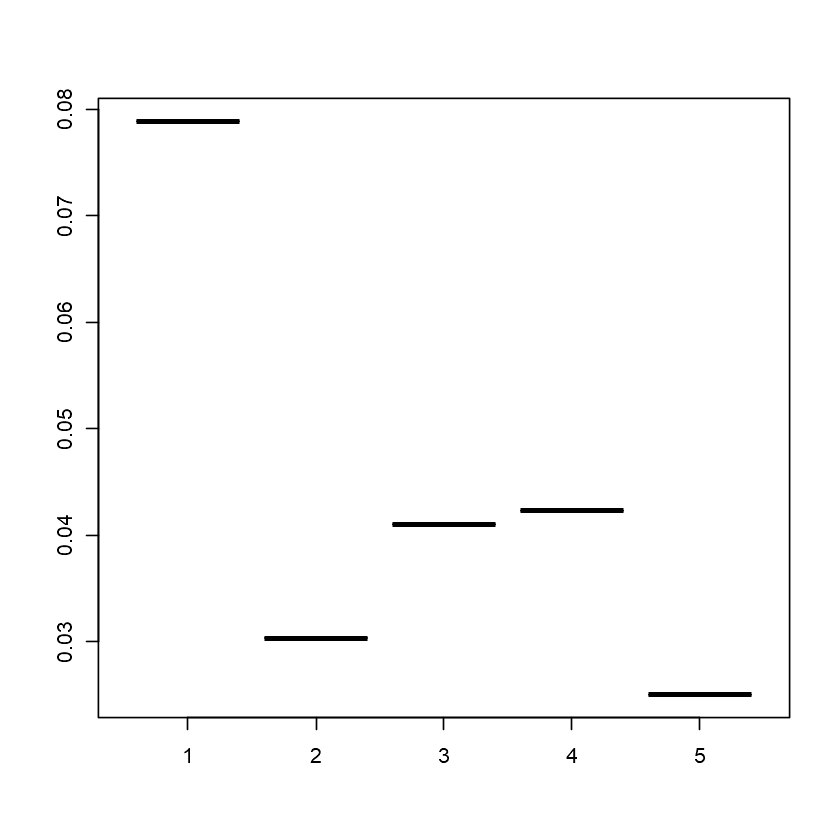

In [7]:
#d


train_wide<-train
min(train_wide[,(Date)])
max(train_wide[,(Date)])


start_date<-min(train_wide[,(Date)])



while  (start_date <=max(train_wide[,(Date)])){
  train_wide[Date==start_date,("Lag_day7_hour_0"):=train_wide[Date==start_date&Hour==0,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_1"):=train_wide[Date==start_date&Hour==1,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_2"):=train_wide[Date==start_date&Hour==2,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_3"):=train_wide[Date==start_date&Hour==3,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_4"):=train_wide[Date==start_date&Hour==4,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_5"):=train_wide[Date==start_date&Hour==5,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_6"):=train_wide[Date==start_date&Hour==6,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_7"):=train_wide[Date==start_date&Hour==7,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_8"):=train_wide[Date==start_date&Hour==8,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_9"):=train_wide[Date==start_date&Hour==9,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_10"):=train_wide[Date==start_date&Hour==10,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_11"):=train_wide[Date==start_date&Hour==11,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_12"):=train_wide[Date==start_date&Hour==12,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_13"):=train_wide[Date==start_date&Hour==13,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_14"):=train_wide[Date==start_date&Hour==14,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_15"):=train_wide[Date==start_date&Hour==15,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_16"):=train_wide[Date==start_date&Hour==16,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_17"):=train_wide[Date==start_date&Hour==17,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_18"):=train_wide[Date==start_date&Hour==18,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_19"):=train_wide[Date==start_date&Hour==19,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_20"):=train_wide[Date==start_date&Hour==20,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_21"):=train_wide[Date==start_date&Hour==21,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_22"):=train_wide[Date==start_date&Hour==22,Lag168]]
  train_wide[Date==start_date,("Lag_day7_hour_23"):=train_wide[Date==start_date&Hour==23,Lag168]]
  train_wide[Date==start_date,("Lag_day2_hour_0"):=train_wide[Date==start_date&Hour==0,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_1"):=train_wide[Date==start_date&Hour==1,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_2"):=train_wide[Date==start_date&Hour==2,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_3"):=train_wide[Date==start_date&Hour==3,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_4"):=train_wide[Date==start_date&Hour==4,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_5"):=train_wide[Date==start_date&Hour==5,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_6"):=train_wide[Date==start_date&Hour==6,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_7"):=train_wide[Date==start_date&Hour==7,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_8"):=train_wide[Date==start_date&Hour==8,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_9"):=train_wide[Date==start_date&Hour==9,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_10"):=train_wide[Date==start_date&Hour==10,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_11"):=train_wide[Date==start_date&Hour==11,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_12"):=train_wide[Date==start_date&Hour==12,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_13"):=train_wide[Date==start_date&Hour==13,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_14"):=train_wide[Date==start_date&Hour==14,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_15"):=train_wide[Date==start_date&Hour==15,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_16"):=train_wide[Date==start_date&Hour==16,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_17"):=train_wide[Date==start_date&Hour==17,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_18"):=train_wide[Date==start_date&Hour==18,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_19"):=train_wide[Date==start_date&Hour==19,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_20"):=train_wide[Date==start_date&Hour==20,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_21"):=train_wide[Date==start_date&Hour==21,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_22"):=train_wide[Date==start_date&Hour==22,Lag48]]
  train_wide[Date==start_date,("Lag_day2_hour_23"):=train_wide[Date==start_date&Hour==23,Lag48]]
  start_date=start_date+1
}

test_wide<-test
start_date<-min(test_wide[,(Date)])

while  (start_date <=max(test_wide[,(Date)])){
  test_wide[Date==start_date,("Lag_day7_hour_0"):=test_wide[Date==start_date&Hour==0,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_1"):=test_wide[Date==start_date&Hour==1,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_2"):=test_wide[Date==start_date&Hour==2,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_3"):=test_wide[Date==start_date&Hour==3,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_4"):=test_wide[Date==start_date&Hour==4,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_5"):=test_wide[Date==start_date&Hour==5,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_6"):=test_wide[Date==start_date&Hour==6,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_7"):=test_wide[Date==start_date&Hour==7,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_8"):=test_wide[Date==start_date&Hour==8,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_9"):=test_wide[Date==start_date&Hour==9,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_10"):=test_wide[Date==start_date&Hour==10,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_11"):=test_wide[Date==start_date&Hour==11,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_12"):=test_wide[Date==start_date&Hour==12,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_13"):=test_wide[Date==start_date&Hour==13,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_14"):=test_wide[Date==start_date&Hour==14,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_15"):=test_wide[Date==start_date&Hour==15,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_16"):=test_wide[Date==start_date&Hour==16,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_17"):=test_wide[Date==start_date&Hour==17,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_18"):=test_wide[Date==start_date&Hour==18,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_19"):=test_wide[Date==start_date&Hour==19,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_20"):=test_wide[Date==start_date&Hour==20,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_21"):=test_wide[Date==start_date&Hour==21,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_22"):=test_wide[Date==start_date&Hour==22,Lag168]]
  test_wide[Date==start_date,("Lag_day7_hour_23"):=test_wide[Date==start_date&Hour==23,Lag168]]
  test_wide[Date==start_date,("Lag_day2_hour_0"):=test_wide[Date==start_date&Hour==0,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_1"):=test_wide[Date==start_date&Hour==1,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_2"):=test_wide[Date==start_date&Hour==2,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_3"):=test_wide[Date==start_date&Hour==3,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_4"):=test_wide[Date==start_date&Hour==4,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_5"):=test_wide[Date==start_date&Hour==5,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_6"):=test_wide[Date==start_date&Hour==6,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_7"):=test_wide[Date==start_date&Hour==7,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_8"):=test_wide[Date==start_date&Hour==8,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_9"):=test_wide[Date==start_date&Hour==9,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_10"):=test_wide[Date==start_date&Hour==10,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_11"):=test_wide[Date==start_date&Hour==11,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_12"):=test_wide[Date==start_date&Hour==12,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_13"):=test_wide[Date==start_date&Hour==13,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_14"):=test_wide[Date==start_date&Hour==14,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_15"):=test_wide[Date==start_date&Hour==15,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_16"):=test_wide[Date==start_date&Hour==16,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_17"):=test_wide[Date==start_date&Hour==17,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_18"):=test_wide[Date==start_date&Hour==18,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_19"):=test_wide[Date==start_date&Hour==19,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_20"):=test_wide[Date==start_date&Hour==20,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_21"):=test_wide[Date==start_date&Hour==21,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_22"):=test_wide[Date==start_date&Hour==22,Lag48]]
  test_wide[Date==start_date,("Lag_day2_hour_23"):=test_wide[Date==start_date&Hour==23,Lag48]]
  start_date=start_date+1
}





Selected_Cols=c("Lag_day2_hour_0","Lag_day2_hour_1","Lag_day2_hour_2","Lag_day2_hour_3","Lag_day2_hour_4","Lag_day2_hour_5","Lag_day2_hour_6","Lag_day2_hour_7","Lag_day2_hour_8","Lag_day2_hour_9","Lag_day2_hour_10","Lag_day2_hour_11","Lag_day2_hour_12","Lag_day2_hour_13","Lag_day2_hour_14","Lag_day2_hour_15","Lag_day2_hour_16","Lag_day2_hour_17","Lag_day2_hour_18","Lag_day2_hour_19","Lag_day2_hour_20","Lag_day2_hour_21","Lag_day2_hour_22","Lag_day2_hour_23",
                "Lag_day7_hour_0","Lag_day7_hour_1","Lag_day7_hour_2","Lag_day7_hour_3","Lag_day7_hour_4","Lag_day7_hour_5","Lag_day7_hour_6","Lag_day7_hour_7","Lag_day7_hour_8","Lag_day7_hour_9","Lag_day7_hour_10","Lag_day7_hour_11","Lag_day7_hour_12","Lag_day7_hour_13","Lag_day7_hour_14","Lag_day7_hour_15","Lag_day7_hour_16","Lag_day7_hour_17","Lag_day7_hour_18","Lag_day7_hour_19","Lag_day7_hour_20","Lag_day7_hour_21","Lag_day7_hour_22","Lag_day7_hour_23")


for (i in 0:23){
  set.seed(1)
  x<-as.matrix(train_wide[Hour==i,..Selected_Cols])
  cv<-cv.glmnet(x=x,y=train_wide[Hour==i,`Consumption (MWh)`],alpha=1,nlambda = 100)
  glm<-glmnet(x=x,y=train_wide[Hour==i,`Consumption (MWh)`],lambda = cv$lambda.1se)
  test_x<-as.matrix(test_wide[Hour==i,..Selected_Cols])
  predicted_glm_y<-predict(glm,s=cv$lambda.1se,test_x,type="response")
  test[Hour==i,("Hourly_Predicted_GLM"):=predicted_glm_y]
}

MAPE_LR_hourly_GLM=sum(abs((test[,`Consumption (MWh)`]-test[,Hourly_Predicted_GLM])/test[,`Consumption (MWh)`]),na.rm=T)/nrow(test)


boxplot(MAPE48,MAPE168,MAPE_LR,MAPE_LR_hourly,MAPE_LR_hourly_GLM)

##As it can be seen from the plot best performing model is the lasso regression model developed with hourly data.
##Also interestingly we can see Linear regression models performance  are even worse than using LAG168 data directly.
##Probably overfitting caused this porblem since we are comparing results from test data.

